In [75]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
# base_csv_path = '/opt/ml/image-classification-level1-25/save/basic_resnet/20210826_173324_result.csv' #resnet 기본 40epoch 66%, 0.585 정도 나옴
# base_csv_path = '/opt/ml/image-classification-level1-25/save/last_single/20210826_231731_result.csv' # simple albu + resnet 21+3epoch 75.75% 0.675
# base_csv_path = '/opt/ml/image-classification-level1-25/save/last_single/20210827_003712_result.csv' # simple albu + resnet 21+3epoch + centercrop 77.5% 0.695
base_csv_path = '/opt/ml/image-classification-level1-25/save/albu resnet/20210827_101341_result.csv' # random albu + resnet 40epoch + centercrop 77.1% 0.707
cur_csv_path = '/opt/ml/image-classification-level1-25/save/basic_resnet/20210826_173324_result.csv'

In [77]:
base_csv_path = '/opt/ml/image-classification-level1-25/save/20epoch_0.1978loss_teameval_0.7814/output.csv'
base_csv_path = '/opt/ml/image-classification-level1-25/save/20epoch_0.1978loss_teameval_0.7814/TTA_output.csv'
cur_csv_path = '/opt/ml/image-classification-level1-25/save/20epoch_0.1978loss_teameval_0.7814/sTTA_output.csv'

(-1.0, 18.0)

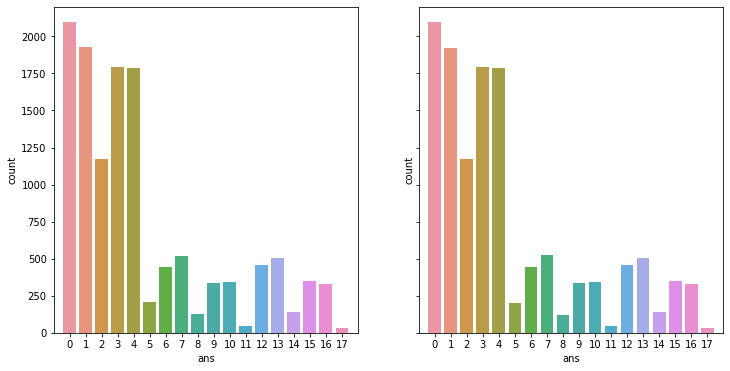

In [78]:
base_df = pd.read_csv(base_csv_path)
cur_df = pd.read_csv(cur_csv_path)

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 6))
sns.countplot(x='ans', data=base_df, ax=axes[0]).set_xlim(-1,18)
sns.countplot(x='ans', data=cur_df, ax=axes[1]).set_xlim(-1,18)

In [69]:
for idx, (basic, TTA) in enumerate(zip(base_df['ans'], cur_df['ans'])):
    if basic != TTA:
        print(f'{basic}, {TTA}')

5, 4
8, 7
8, 7
4, 2
3, 2
5, 2
0, 6
0, 2
13, 12
1, 2
1, 0
8, 7
1, 2
16, 15
3, 4
5, 4
2, 4
5, 4
1, 4
11, 10
4, 3
8, 7


In [79]:
# base_df = base_df.append({'ImageID':'a', 'ans' : 100},  ignore_index=True)
base_df['ans'].unique()

array([13,  2, 12,  0,  7,  4,  3,  6,  1, 16,  5,  9, 10, 15, 14, 17, 11,
        8])

In [71]:
df_merge = pd.merge(left = base_df , right = cur_df, how = "outer", on = "ImageID")

In [72]:
len(df_merge[df_merge['ans_x'] != df_merge['ans_y']])

22

In [74]:
df_merge[df_merge['ans_x'] != df_merge['ans_y']]

,ImageID,ans_x,ans_y
782,fc17a8ee89a6cfca8dbf49f0450d05484d3f8214.jpg,5,4
1488,c5aa68de6b8a5fef146ea017677abf379c34f574.jpg,8,7
2658,b0f0bd7586588f4501ab3e6bdd2496f54e16a132.jpg,8,7
3389,24a068b904d932ee2320f16bb65dcfe19a09c205.jpg,4,2
4238,596d33fc8e321bf3fc48becfb34adea03ce631fb.jpg,3,2
4465,8737db9caeb73039cecf00b8f03b476a91e28f12.jpg,5,2
4689,b2e9f869e87a927bac049e73e2e40742878faedf.jpg,0,6
5567,1f4be84d2245065466ea3131e0eed6282f15aa05.jpg,0,2
5602,5cd25aeed8bc549f6c403bf4f0427ebc0c340ede.jpg,13,12
6081,64b11e9f2690bfdcc39f55d09a5a2a4225d09974.jpg,1,2
